In [13]:
from helpers import int_to_bits, bits_to_int

bits_to_int(int_to_bits(257, 16))

257

In [1]:
from helpers import read_bin_file_data, write_bin_data_to_file
from LZW import lzw_compress, lzw_decompress

data = read_bin_file_data("Test Files/txt/lorem.txt")
print(data)
print(f"Original size: {len(data)} bytes")
encoded_data = lzw_compress(data)

print(f"Encoded size: {len(encoded_data)} bytes")
decoded_data = lzw_decompress(encoded_data)

data == decoded_data

b'\r\n\r\nLorem ipsum dolor sit amet, consectetur adipiscing elit. Proin non eleifend urna. Vestibulum est orci, suscipit nec tincidunt vel, rutrum rutrum urna. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Aliquam egestas a nisl ac posuere. Proin viverra quam vel molestie porttitor. Morbi tempor libero metus, ac lobortis tortor finibus id. Aliquam eros ante, efficitur ut nibh non, venenatis accumsan diam. Vivamus ac commodo purus. Proin cursus neque porttitor suscipit gravida. In euismod cursus lorem laoreet luctus. Sed gravida ornare dolor. Nulla cursus ligula ut commodo volutpat. Cras in felis vehicula, fringilla risus ac, elementum eros. Mauris in dapibus mauris, sed aliquam tellus. Ut pharetra vulputate arcu sit amet venenatis. Praesent ullamcorper diam sem, at rhoncus nunc bibendum id.\r\n\r\nDuis egestas tincidunt lorem ac consequat. Morbi dapibus ultrices odio, sed varius augue pulvinar ac. Pellentesque vitae turpis lacinia, susci

True

Encoded size: 29741 bytes
Reading inxed: 13
Writing phrase: b'\r'
Bitlength: 9
Reading inxed: 10
Writing phrase: b'\n'
Bitlength: 9
Reading inxed: 256
Writing phrase: b'\r\n'
Bitlength: 9
Reading inxed: 76
Writing phrase: b'L'
Bitlength: 9
Reading inxed: 111
Writing phrase: b'o'
Bitlength: 9
Reading inxed: 114
Writing phrase: b'r'
Bitlength: 9
Reading inxed: 101
Writing phrase: b'e'
Bitlength: 9
Reading inxed: 109
Writing phrase: b'm'
Bitlength: 9
Reading inxed: 32
Writing phrase: b' '
Bitlength: 9
Reading inxed: 105
Writing phrase: b'i'
Bitlength: 9
Reading inxed: 112
Writing phrase: b'p'
Bitlength: 9
Reading inxed: 115
Writing phrase: b's'
Bitlength: 9
Reading inxed: 117
Writing phrase: b'u'
Bitlength: 9
Reading inxed: 263
Writing phrase: b'm '
Bitlength: 9
Reading inxed: 100
Writing phrase: b'd'
Bitlength: 9
Reading inxed: 111
Writing phrase: b'o'
Bitlength: 9
Reading inxed: 108
Writing phrase: b'l'
Bitlength: 9
Reading inxed: 260
Writing phrase: b'or'
Bitlength: 9
Reading inxed: 32

In [3]:
encoded_data

b'\xb0\xa0\x02\x90a\xcf\x89)[\x04,9p\xe6\x1a\x9c\t{6A\x10pf\xc9\x05\x01C\xb6L\xb9\xa0A\xc0\x98=;\xceL\x19s\x89\xc9\x95S4&!Yrf\xcc\x92\x1ds\x04L\xd9DA\x87\x80\x02\'\xf6i\x11\xb0\x8b\x97\x81\rS\x96\xcc\x98\xb2c\x82 );\x86Y\xa81\xe5\xcc\x85%#\xael\xc2d(\x83 H\x9a\xd8\xa1S\xa7\x8c\xca.!\x82\xb2\xec\xd20\xe1\xca.*\xb7\x8c\xb19q\xe5\xd2*x\xab6\x95\x8a\x95\xc8\x9a1_\xd3\xd2\x1c\xb92E\xc0\x82!\xa3(\x0c\x9b"`\x1b\xa4\x7f}N\xa9\xca\xf6\xec\x9d\xa0n"\xae\x9c3\xd4I21\xe6`\x86\xf9B3d\xc2\x10\x01\xb3\xe8\xa5\xa31\xae\x9f\x94C\xaa\x0c\xccKsa\xc89\x0b\xc1L=\xa3\xafX\xb5&Z\xaeTl\x16!\xe0\xc0>4\xd3\xa0Y\xb2\xe5`\x87\x80\x1b\xcb\xe6\x9c8\xcd\xdd\x18\xbc\xf9\xce!3\xcb\xf6\xde\xc3\x89KY.A\xb2\x90\x1d\xca\xb2~\xb0+\x0821\xda\xcf~\xf0\x94\xd8\x0c\x17G`\x14\xa4\xec\xc4\x1bW#2K[nB\x08&\xeb6p\xdd\xf4d\xe2\xc0\xc4bc\x8a\x99\xcf\xd2\xe0"\xa9\xa2\xea(\x87\x85\\\xe2\x89\xad\xb9\xba\x8a{g\x11\xc6\xc2\xe0l \x04R\x88\xae\xa4\xe3\xa2\xfb\xe6\xa58\xd8ck\x88pvKj\x82\x83\xb2\xcb\x19\nNj\xca\x85\xa9\xd1v{\xeb\xba\x88jJc\x9

In [5]:
write_bin_data_to_file(decoded_data, "Test Files/txt/lorem_decoded.txt")

Processing file: Test Files/exe/DockerCli.exe
Processing file: Test Files/exe/Kodirovka.exe
Processing file: Test Files/exe/matlab.exe
Processing file: Test Files/exe/notepad++.exe
Processing file: Test Files/exe/rustup-init.exe
Processing file: Test Files/exe/Samsung Notes Installer.exe
Processing file: Test Files/exe/vs_BuildTools.exe
Processing file: Test Files/exe/Wireshark.exe
Processing file: Test Files/exe/wsl.exe


(array([3., 1., 0., 1., 2., 0., 0., 0., 0., 2.]),
 array([0.76537962, 0.7888121 , 0.81224458, 0.83567705, 0.85910953,
        0.88254201, 0.90597449, 0.92940697, 0.95283945, 0.97627193,
        0.9997044 ]),
 <BarContainer object of 10 artists>)

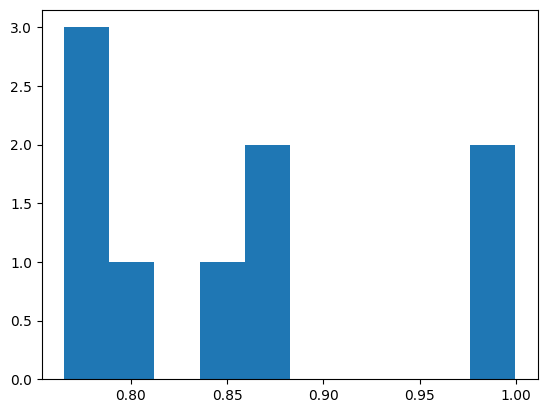

In [ ]:
import os
from helpers import read_bin_file_data, write_bin_data_to_file
from Huffman import huffman_encode, huffman_decode
import matplotlib.pyplot as plt

compression_ratio = []

directory = "Test Files"
ext = "exe"
for filename in os.listdir(f"{directory}/{ext}"):
    filepath = f"{directory}/{ext}/{filename}"
    if os.path.isfile(filepath):
        print(f"Processing file: {filepath}")
        data = read_bin_file_data(filepath)
        og_len = len(data)
        encoded_data = huffman_encode(data)
        enc_len = len(encoded_data)

        compression_ratio.append(enc_len / og_len)

plt.hist(compression_ratio)

In [7]:
def f(x):
    return ((x + 3) % 8) | x

def shift(x):
    y = (x << 1)
    if y >= 8:
        y = (y % 8) + 1

    return y

for x in range(8):
    print(f"{x:0{3}b} | {f(x):0{3}b} | {f(shift(x)):0{3}b} | {shift(f(x)):0{3}b} | {f(shift(x)) == shift(f(x))}")

000 | 011 | 011 | 110 | False
001 | 101 | 111 | 011 | False
010 | 111 | 111 | 111 | True
011 | 111 | 111 | 111 | True
100 | 111 | 101 | 111 | False
101 | 101 | 111 | 011 | False
110 | 111 | 101 | 111 | False
111 | 111 | 111 | 111 | True


In [3]:
() + (True, False) + ()

(True, False)

In [22]:
from helpers import ReadBitStream

s = ReadBitStream(bytes(b'\x01\xf2\xf3\x04'))

for n in range(s.N):
    print(int(s.read_bit()), end='')


10000000010011111100111100100000

In [9]:
from helpers import WriteBitStream, ReadBitStream

ws = WriteBitStream()

ws.write_byte(243)
ws.write_byte(111)
ws.write_byte(12)
ws.write_bits([1, 0, 1, 1, 1, 0])
ws.write_byte(255)
ws.write_bit(0)
ws.write_bit(1)
rs = ReadBitStream(ws.get_data())

for n in range(rs.N):
    print(int(rs.read_bit()), end='')

1100111111110110001100001011101111111101

SyntaxError: invalid decimal literal (1937980239.py, line 1)

In [19]:
arr = bytearray(1)
arr[0] = 64
arr[0] = (arr[0] << 7)

arr.append(0)
arr

ValueError: byte must be in range(0, 256)

In [21]:
64 >> 12

0

In [ ]:




data = read_bin_file_data()
encoded_data = bytearray(len(data))

encoded_data[1:4] = b'\x01\x02\x03\x04'

encoded_data

bytearray(b'\x00\x01\x02\x03\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [12]:
import os

path, ext = os.path.splitext("C:\\Users\\matki\\Документи\\VS Code\\Crypto\\Encodings\\app.py")

print(path)
print(ext)

C:\Users\matki\Документи\VS Code\Crypto\Encodings\app
.py


In [2]:
arr = bytearray()
c = int.to_bytes(128)

arr.append(c)
arr

TypeError: 'bytes' object cannot be interpreted as an integer

In [11]:
from helpers import read_bin_file_data
from RLE import RLE_encode, RLE_decode

# data = bytes(b'\x01\x02\x03\x04\x04\x04\x04\x03\x03\x03\x03\x01\x01\x01\x01\x04\x04\x03\x04\x04\x03\x03\x01\x01\x04\x04\x04\x05')
data = read_bin_file_data("C:\\Users\\matki\\Документи\\VS Code\\Crypto\\output.png")
print(len(data))
encoded = RLE_encode(data)
print(len(encoded))
decoded = RLE_decode(encoded)
print(decoded == data)

15364
15384
True


In [5]:
def outer():
    count = 0

    def inner():
        nonlocal count   # tell Python we want to modify outer()’s variable
        count += 1
        return count

    return inner()  # return the inner function itself

counter = outer()
print(counter)  # 1
print(counter())  # 2
print(counter())  # 3


1


TypeError: 'int' object is not callable